<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Akeed_4_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this section, we will be implementing unsupervised learning to create clusters for the customers.

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import plotly.express as px

In [ ]:
clean = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/cleaned_train.csv')
clean.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9,789
1,TCHWPBT,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,1.0,3,TCHWPBT X 0 X 13,0,14,10223.800918,84,788
2,TCHWPBT,0,1,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,1.0,3,TCHWPBT X 0 X 20,0,14,10232.068678,86,789
3,TCHWPBT,0,1,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,1.0,3,TCHWPBT X 0 X 23,0,12,10211.117900,88,784
4,TCHWPBT,0,1,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 28,0,12,10331.347778,99,787


In [ ]:
clean.shape

(5801800, 30)

In [ ]:
clean.drop(clean.columns[[0,11]], axis=1, inplace=True)
clean.shape

(5801800, 28)

In [ ]:
clean.reset_index(drop=True)
clean.head()

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9,789
1,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,1.0,3,TCHWPBT X 0 X 13,0,14,10223.800918,84,788
2,0,1,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,1.0,3,TCHWPBT X 0 X 20,0,14,10232.068678,86,789
3,0,1,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,1.0,3,TCHWPBT X 0 X 23,0,12,10211.117900,88,784
4,0,1,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 28,0,12,10331.347778,99,787


In [ ]:
# implement downsampling for target class
no_order = clean[clean.target == 0]
no_order = no_order.sample(frac=0.015)

In [ ]:
# create train set
train = pd.concat([clean[clean.target == 1], no_order], ignore_index=True)
train.shape

(164102, 28)

In [ ]:
train.target.value_counts()

0    85853
1    78249
Name: target, dtype: int64

## Pearson's Correlation

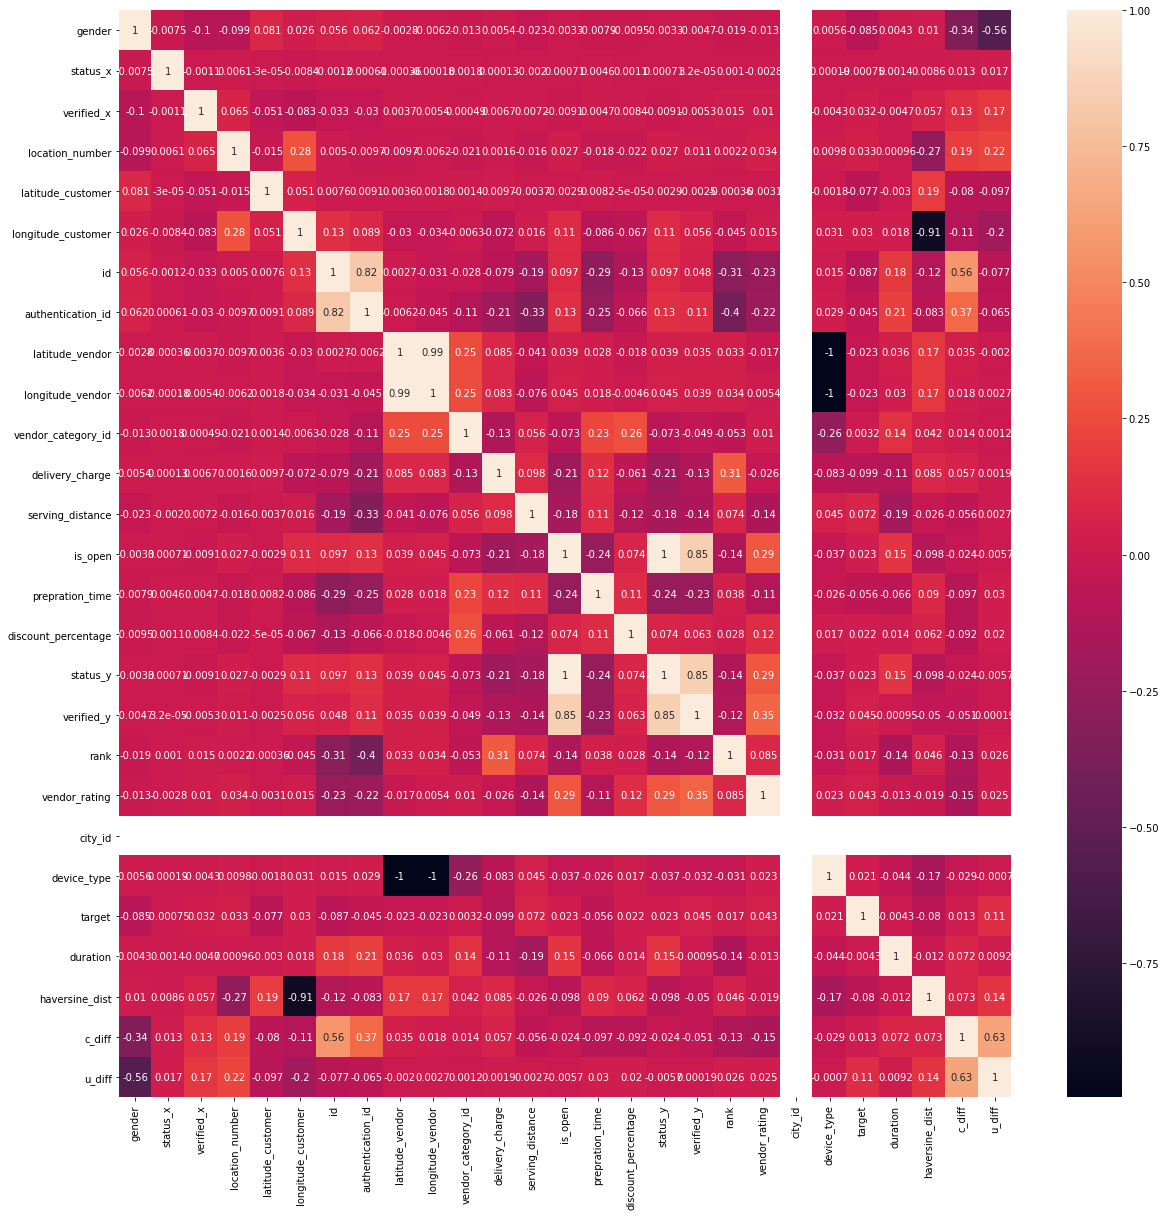

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
train.drop(['device_type', 'is_open', 'status_y'], 1)

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,prepration_time,discount_percentage,verified_y,rank,vendor_rating,city_id,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,0,1,1,0,-96.44000,-67.200000,237,118838.0,-0.94340,0.0817,2.0,0.7,15.0,15,0.0,0,11,4.6,1.0,TCHWPBT X 0 X 237,1,5,10179.280752,446,789
1,0,1,1,2,-0.12870,-78.560000,113,118710.0,0.63040,0.5270,2.0,0.0,15.0,10,0.0,1,11,4.7,1.0,TCHWPBT X 2 X 113,1,12,8794.323110,258,790
2,0,1,1,0,-0.17550,-78.560000,274,118875.0,0.30540,0.5600,3.0,0.7,15.0,45,0.0,0,11,3.7,1.0,ZGFSYCZ X 0 X 274,1,12,8797.883809,476,787
3,0,1,1,0,-0.17550,-78.560000,303,118905.0,0.00575,0.4822,2.0,0.7,15.0,15,0.0,1,11,4.7,1.0,ZGFSYCZ X 0 X 303,1,7,8789.111559,508,781
4,0,1,1,1,0.19120,-78.600000,28,118624.0,0.48070,0.5527,2.0,0.7,15.0,10,0.0,1,11,4.4,1.0,ZGFSYCZ X 1 X 28,1,12,8801.258975,97,786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164097,0,1,1,0,-0.37740,-78.560000,20,118616.0,-0.40750,0.6436,2.0,0.0,8.0,19,0.0,1,1,4.5,1.0,KU0KW1H X 0 X 20,0,14,8806.803900,-215,489
164098,2,1,1,2,0.03503,0.825000,4,118597.0,-0.58840,0.7544,2.0,0.0,6.0,15,0.0,1,11,4.4,1.0,F5YDZDB X 2 X 4,0,12,69.765424,-530,188
164099,2,1,1,5,0.44100,0.004707,189,118787.0,-0.85700,0.0877,2.0,0.7,15.0,10,0.0,1,11,4.3,1.0,W2DY6U0 X 5 X 189,0,16,144.625925,-148,188
164100,2,1,1,2,-0.72600,-0.174000,82,118679.0,-0.41720,0.6460,2.0,0.7,8.0,11,0.0,1,11,4.4,1.0,FO9FL8K X 2 X 82,0,15,97.426747,-285,188


## Predictive power score


In [ ]:
pip install -U ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12987 sha256=8d2215e514faa297a8a9d877ee8513c3a74dd0a56be0ccf0ac2c2b57cbc27a99
  Stored in directory: /root/.cache/pip/wheels/3a/16/cb/4768ae3fd9f02af8cd6d880b9095281cc62bb1748fac67fdc4
Successfully built ppscore


In [ ]:
import ppscore as pps

pps.predictors(train, 'target')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,haversine_dist,target,0.154533,regression,True,mean absolute error,0.489,0.413433,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,latitude_vendor,target,0.084235,regression,True,mean absolute error,0.489,0.447809,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,id,target,0.084201,regression,True,mean absolute error,0.489,0.447825,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,authentication_id,target,0.084201,regression,True,mean absolute error,0.489,0.447825,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,longitude_vendor,target,0.070712,regression,True,mean absolute error,0.489,0.454422,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
5,longitude_customer,target,0.023781,regression,True,mean absolute error,0.489,0.477371,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,duration,target,0.005596,regression,True,mean absolute error,0.489,0.486264,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,u_diff,target,0.002899,regression,True,mean absolute error,0.489,0.487583,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,gender,target,0.000000,regression,True,mean absolute error,0.489,0.496140,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
9,status_x,target,0.000000,regression,True,mean absolute error,0.489,0.500146,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


## Train Test Split

In [ ]:
# shuffle the train data set
train = train.sample(frac = 1, random_state=69)
train = train.reset_index(drop=True)
train.head()

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,0,1,1,1,0.1741,-78.60000,82,118679.0,-0.4172,0.6460,2.0,0.7,8.0,1.0,11,0.0,1.0,1,11,4.4,1.0,3,LYBQVP0 X 1 X 82,1,15,8811.946474,-201,381
1,0,1,1,1,-0.2034,0.63100,250,118851.0,-0.5117,0.7583,2.0,0.7,5.0,1.0,15,0.0,1.0,1,11,4.5,1.0,3,ZISR0D0 X 1 X 250,1,14,37.088770,-142,141
2,1,1,1,0,-0.2242,-78.56000,4,118597.0,-0.5884,0.7544,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,1.0,3,3IZ0H87 X 0 X 4,1,12,8819.183134,-271,527
3,2,1,1,0,-0.8300,0.11896,83,118680.0,-0.9277,0.1459,2.0,0.7,15.0,1.0,15,0.0,1.0,1,11,4.2,1.0,3,TNPSPEV X 0 X 83,0,12,11.269106,-501,65
4,2,1,1,0,19.7500,3.15000,192,118790.0,1.7030,0.7600,2.0,0.7,10.0,1.0,11,0.0,1.0,1,11,4.3,1.0,3,FEXYMAG X 0 X 192,0,14,2023.499315,-330,62


In [ ]:
# assign target and variables
X = train.drop(['target','CID X LOC_NUM X VENDOR'], axis=1)
y = train.target

In [ ]:
# split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

## Cluster Modelling

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
# find the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

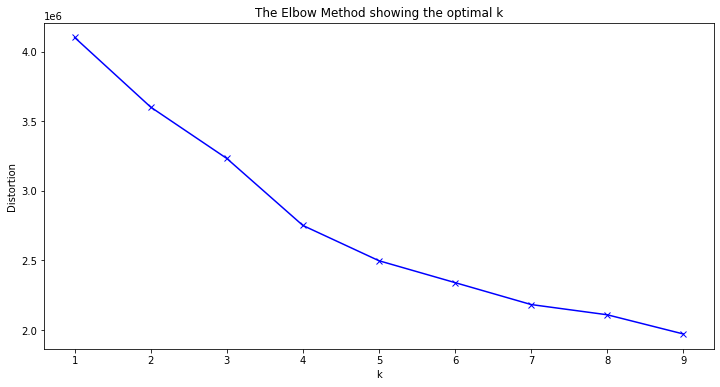

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# implement k-means clustering
kmeans = kmeans = KMeans(n_clusters=5, algorithm = 'auto')
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Normalized k-means

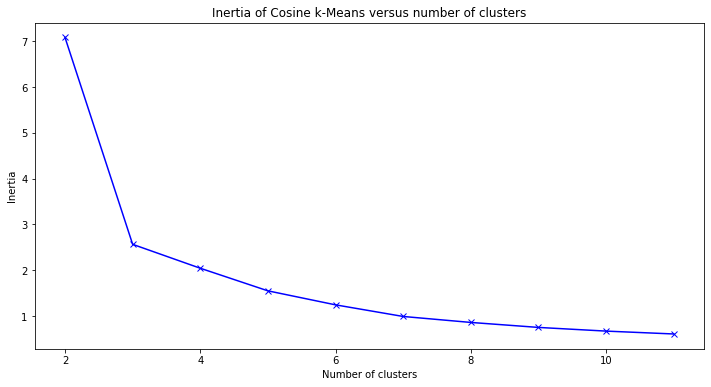

In [ ]:
# 
normalized_vectors = normalize(X)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]
plt.figure(figsize=(12,6))
K = range(2,12)
plt.plot(K, scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.show()

In [ ]:
normalized_kmeans = KMeans(n_clusters=5)
normalized_kmeans.fit(normalized_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Evaluate the clusters

In [ ]:
# compare clusters using silhouette_score
print('kmeans: {}'.format(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')))
print('Cosine kmeans: {}'.format(silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine')))

kmeans: 0.19487649108686936
Cosine kmeans: 0.6945605799766981


## Examining the clusters

In [ ]:
# scale the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X))
df_scaled.columns = X.columns
df_scaled['normalized_kmeans'] = normalized_kmeans.labels_
df_scaled.head()

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,duration,haversine_dist,c_diff,u_diff,normalized_kmeans
0,0.0,1.0,1.0,0.034483,0.597242,0.310448,0.086379,0.005712,0.006618,0.045874,0.0,1.0,0.461538,1.0,0.15,0.0,1.0,1.0,1.0,0.7500,0.0,1.0,0.948718,0.558692,0.389197,0.507229,1
1,0.0,1.0,1.0,0.034483,0.596907,0.751257,0.272425,0.017693,0.006161,0.048333,0.0,1.0,0.230769,1.0,0.25,0.0,1.0,1.0,1.0,0.8125,0.0,1.0,0.923077,0.002351,0.430055,0.218072,2
2,0.5,1.0,1.0,0.000000,0.596889,0.310671,0.000000,0.000000,0.005791,0.048247,0.0,0.0,0.307692,1.0,0.25,0.0,1.0,1.0,1.0,0.7500,0.0,1.0,0.871795,0.559151,0.340720,0.683133,1
3,1.0,1.0,1.0,0.000000,0.596351,0.748409,0.087486,0.005782,0.004151,0.034923,0.0,1.0,1.000000,1.0,0.25,0.0,1.0,1.0,1.0,0.6250,0.0,1.0,0.871795,0.000714,0.181440,0.126506,2
4,1.0,1.0,1.0,0.000000,0.614623,0.765272,0.208195,0.013444,0.016861,0.048370,0.0,1.0,0.615385,1.0,0.15,0.0,1.0,1.0,1.0,0.6875,0.0,1.0,0.923077,0.128293,0.299861,0.122892,4


Due to the high number of variables, we wil visualize only those that have the greatest impact on a cluster.

In [ ]:
# Calculate variables with largest differences (by standard deviation)
df_mean = df_scaled.loc[df_scaled.normalized_kmeans!=-1, :].groupby('normalized_kmeans').mean().reset_index(drop=True)
results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(7).Variable.values) + ['normalized_kmeans']

### Note:
The higher the standard deviation in a variable based on average values for each cluster. The more likely that the variable is important when creating the cluster

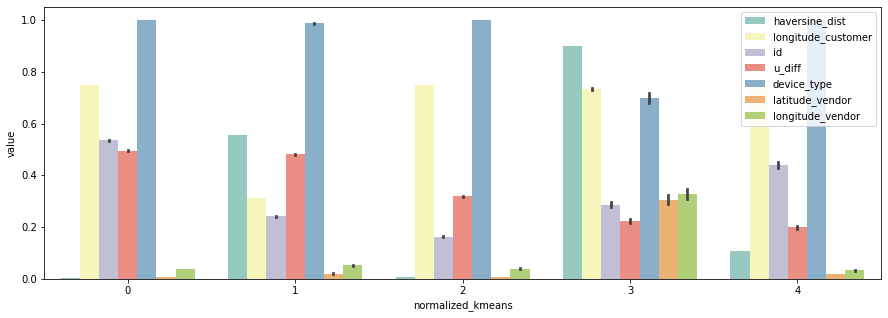

In [ ]:
# Plot data
tidy = df_scaled[selected_columns].melt(id_vars='normalized_kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='normalized_kmeans', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')
plt.show()

In [ ]:
train['normalized_kmeans'] = normalized_kmeans.labels_
train.head()

,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff,normalized_kmeans
0,0,1,1,1,0.1741,-78.60000,82,118679.0,-0.4172,0.6460,2.0,0.7,8.0,1.0,11,0.0,1.0,1,11,4.4,1.0,3,LYBQVP0 X 1 X 82,1,15,8811.946474,-201,381,1
1,0,1,1,1,-0.2034,0.63100,250,118851.0,-0.5117,0.7583,2.0,0.7,5.0,1.0,15,0.0,1.0,1,11,4.5,1.0,3,ZISR0D0 X 1 X 250,1,14,37.088770,-142,141,2
2,1,1,1,0,-0.2242,-78.56000,4,118597.0,-0.5884,0.7544,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,1.0,3,3IZ0H87 X 0 X 4,1,12,8819.183134,-271,527,1
3,2,1,1,0,-0.8300,0.11896,83,118680.0,-0.9277,0.1459,2.0,0.7,15.0,1.0,15,0.0,1.0,1,11,4.2,1.0,3,TNPSPEV X 0 X 83,0,12,11.269106,-501,65,2
4,2,1,1,0,19.7500,3.15000,192,118790.0,1.7030,0.7600,2.0,0.7,10.0,1.0,11,0.0,1.0,1,11,4.3,1.0,3,FEXYMAG X 0 X 192,0,14,2023.499315,-330,62,4


In [ ]:
# Split data set by clusters
cluster_0 = train[train.normalized_kmeans == 0].reset_index(drop=True)
cluster_1 = train[train.normalized_kmeans == 1].reset_index(drop=True)
cluster_2 = train[train.normalized_kmeans == 2].reset_index(drop=True)
cluster_3 = train[train.normalized_kmeans == 3].reset_index(drop=True)
cluster_4 = train[train.normalized_kmeans == 4].reset_index(drop=True)

In [ ]:
# export train data set with clusters
train.to_csv('/content/drive/My Drive/Akeed Recommendation Files/clustered_train.csv', index =False)

## Neural Networks

In [ ]:
# Import a standardization library
from sklearn.preprocessing import StandardScaler
# Import an Multi-Layer Perceptron Classifier model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Scale the targets
scaler = StandardScaler()

# Fit the training data
scaler.fit(X_train)

# Transform the features
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# Create instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', max_iter=500)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_val)

# Evaluate the model
cm = confusion_matrix(y_val, y_pred)
print(cm)
print('\n')
print(classification_report(y_val, y_pred))

[[12657  4477]
 [ 3936 11751]]


              precision    recall  f1-score   support

           0       0.76      0.74      0.75     17134
           1       0.72      0.75      0.74     15687

    accuracy                           0.74     32821
   macro avg       0.74      0.74      0.74     32821
weighted avg       0.74      0.74      0.74     32821



In [ ]:
## Building a sequential model


In [ ]:
X.shape

(164102, 26)

In [ ]:
# Import libraries for modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import datetime
import time

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
model = Sequential()

#Hidden layer 1, 12 nodes, activation_fn: relu, input is our predictor features
model.add(Dense(12, activation='relu', input_shape=(26,)))

#Disable 30% of nodes in this layer to improve network's accuracy
model.add(Dropout(0.3))

#Hidden layer 2, 12 nodes, activation_fn: relu, input is the result of hidden layer 1. This is automatically done by the framework
model.add(Dense(12, activation='relu'))

#Disable 30% of nodes in hidden layer 2
model.add(Dropout(0.3)) 

#Output layer that will eventually provide the result of the training
model.add(Dense(1, activation='sigmoid'))

#Provides a summary of how our network will look like
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                324       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Let's train the model

#Set learning rate to 0.001
learning_rate = 0.001

#Optimizer uses an optimizing algorithm. RMSProp is one of them, others include sgd, momentum and adam.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Let's now fit with the training data
#We train our model over 10 iterations
#Batch size means the algorithms groups the 4000 items into groups of 1 training each group until 4000 items are trained resulting in end of epoch.
model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/5
4103/4103 [==============================] - 6s 1ms/step - loss: 0.6644 - accuracy: 0.5862 - val_loss: 0.6280 - val_accuracy: 0.6292
Epoch 2/5
4103/4103 [==============================] - 5s 1ms/step - loss: 0.6361 - accuracy: 0.6151 - val_loss: 0.6175 - val_accuracy: 0.6429
Epoch 3/5
4103/4103 [==============================] - 5s 1ms/step - loss: 0.6294 - accuracy: 0.6252 - val_loss: 0.6139 - val_accuracy: 0.6395
Epoch 4/5
4103/4103 [==============================] - 5s 1ms/step - loss: 0.6229 - accuracy: 0.6296 - val_loss: 0.6096 - val_accuracy: 0.6481
Epoch 5/5
4103/4103 [==============================] - 5s 1ms/step - loss: 0.6203 - accuracy: 0.6323 - val_loss: 0.6063 - val_accuracy: 0.6521


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

def plot_tsne(tnse_data, kmeans_labels):
    df_tsne = pd.DataFrame(tsne_data).rename({0: 'x', 1: 'y'}, axis=1)
    df_tsne['z'] = kmeans_labels
    sns.scatterplot(x=df_tsne.x, y=df_tsne.y, hue=df_tsne.z, palette="Set2")
    plt.show()
    
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def prepare_tsne(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = TSNE(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix
    
def plot_animation(df, label_column, name):
    def update(num):
        ax.view_init(200, num)

    N=360
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(tsne_3d_df['x'], tsne_3d_df['y'], tsne_3d_df['z'], c=tsne_3d_df[label_column],
               s=6, depthshade=True, cmap='Paired')
    ax.set_zlim(-15, 25)
    ax.set_xlim(-20, 20)
    plt.tight_layout()
    ani = animation.FuncAnimation(fig, update, N, blit=False, interval=50)
    ani.save('{}.gif'.format(name), writer='imagemagick')
    plt.show()

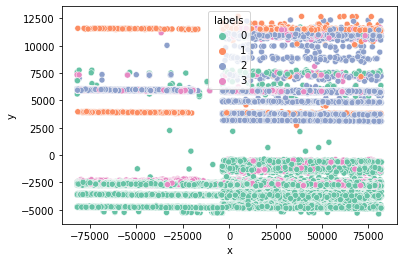

In [ ]:
pca_df = prepare_pca(2, X, kmeans.labels_)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, 
                palette="Set2")
plt.show()

In [ ]:
tsne_3d_df = prepare_tsne(3, df, kmeans.labels_)
# tsne_3d_df['normalized_kmeans'] = normalized_kmeans.labels_
# tsne_3d_df['dbscan'] = dbscan.labels_
plot_animation(tsne_3d_df, 'kmeans', 'kmeans')
# plot_animation(tsne_3d_df, 'normalized_kmeans', 'normalized_kmeans')
# plot_animation(tsne_3d_df, 'dbscan', 'dbscan')

NameError: ignored

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Prepare models
kmeans = KMeans(n_clusters=4).fit(X_scaled)
normalized_vectors = preprocessing.normalize(X)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
min_samples = X.shape[1]+1 
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X_scaled)
# Print results
print('kmeans: {}'.format(silhouette_score(X_scaled, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
print('DBSCAN: {}'.format(silhouette_score(X_scaled, dbscan.labels_, 
                                           metric='cosine')))

## Baseline Model (Logistic Regression)


In [ ]:
# scale the features using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using the model to make predictions
y_pred = LogReg.predict(X_val)

## Feature reduction (PCA)


In [ ]:
# scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
# import PCA
from sklearn.decomposition import PCA
# train using n principal components
pca = PCA()
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

In [ ]:
# import Random Forest Classifier for predictions
# from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(random_state=9)
# classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)

In [ ]:
# check model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_val, y_pred))